In [65]:
%matplotlib notebook

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [67]:
chronical_d = pd.read_csv("Resources/Cleaned_Chronic_Disease_Data_4.csv")

In [68]:
chronical_d.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Topic,Question,DataValueUnit,DataValue,StratificationCategory1,Latitude,Longitude
0,2016,2016,AL,Alabama,Alcohol,Binge drinking prevalence among adults aged >=...,%,13.0,Overall,32.840571,-86.631861
1,2016,2016,AK,Alaska,Alcohol,Binge drinking prevalence among adults aged >=...,%,18.2,Overall,64.845080,-147.722059
2,2016,2016,AZ,Arizona,Alcohol,Binge drinking prevalence among adults aged >=...,%,15.6,Overall,34.865970,-111.763811
3,2016,2016,AR,Arkansas,Alcohol,Binge drinking prevalence among adults aged >=...,%,15.0,Overall,34.748650,-92.274491
4,2016,2016,CA,California,Alcohol,Binge drinking prevalence among adults aged >=...,%,16.3,Overall,37.638640,-121.000000


In [69]:
chronical_d = chronical_d[[(x == 'Overall') for x in chronical_d['StratificationCategory1']]]

In [70]:
group=chronical_d.groupby('Topic')
group.first

<bound method GroupBy.first of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x125894c18>>

In [71]:
group.get_group('Alcohol')

,YearStart,YearEnd,LocationAbbr,LocationDesc,Topic,Question,DataValueUnit,DataValue,StratificationCategory1,Latitude,Longitude
0,2016,2016,AL,Alabama,Alcohol,Binge drinking prevalence among adults aged >=...,%,13.0,Overall,32.840571,-86.631861
1,2016,2016,AK,Alaska,Alcohol,Binge drinking prevalence among adults aged >=...,%,18.2,Overall,64.845080,-147.722059
2,2016,2016,AZ,Arizona,Alcohol,Binge drinking prevalence among adults aged >=...,%,15.6,Overall,34.865970,-111.763811
3,2016,2016,AR,Arkansas,Alcohol,Binge drinking prevalence among adults aged >=...,%,15.0,Overall,34.748650,-92.274491
4,2016,2016,CA,California,Alcohol,Binge drinking prevalence among adults aged >=...,%,16.3,Overall,37.638640,-121.000000
5,2016,2016,CO,Colorado,Alcohol,Binge drinking prevalence among adults aged >=...,%,19.0,Overall,38.843841,-106.133611
6,2016,2016,CT,Connecticut,Alcohol,Binge drinking prevalence among adults aged >=...,%,16.7,Overall,41.562661,-72.649841
7,2016,2016,DE,Delaware,Alcohol,Binge drinking prevalence among adults aged >=...,%,17.0,Overall,39.008831,-75.577741
8,2016,2016,DC,District of Columbia,Alcohol,Binge drinking prevalence among adults aged >=...,%,25.6,Overall,38.907192,-77.036871
9,2016,2016,FL,Florida,Alcohol,Binge drinking prevalence among adults aged >=...,%,15.5,Overall,28.932040,-81.928961


In [72]:
chronical_d.groupby(['Topic'])['DataValue'].mean()

Topic
Alcohol                                            13.766552
Arthritis                                          38.955112
Asthma                                             41.675686
Cancer                                             76.594345
Cardiovascular Disease                             53.903731
Chronic Kidney Disease                              2.676803
Chronic Obstructive Pulmonary Disease              40.818920
Diabetes                                           49.306355
Disability                                         36.515110
Immunization                                       39.002821
Mental Health                                      14.629825
Nutrition, Physical Activity, and Weight Status    37.182896
Older Adults                                       48.994201
Oral Health                                        43.779307
Overarching Conditions                             56.456375
Reproductive Health                                64.198017
Tobacco           

In [73]:
chronical_d.groupby(['LocationDesc'])['DataValue'].mean()

LocationDesc
Alabama                 44.187196
Alaska                  41.017667
Arizona                 40.818926
Arkansas                42.945917
California              40.297768
Colorado                42.206860
Connecticut             42.198386
Delaware                43.697541
District of Columbia    42.078737
Florida                 41.385830
Georgia                 43.068563
Guam                    34.192191
Hawaii                  41.077744
Idaho                   39.935321
Illinois                40.882225
Indiana                 42.869592
Iowa                    45.043311
Kansas                  43.116545
Kentucky                44.376473
Louisiana               44.024128
Maine                   44.289565
Maryland                41.143080
Massachusetts           43.019112
Michigan                42.953918
Minnesota               43.527179
Mississippi             42.891828
Missouri                43.327427
Montana                 42.129197
Nebraska                42.776122
N

In [74]:
df = chronical_d.groupby(['LocationDesc'])['DataValue'].mean()
df
df2 = pd.DataFrame(df)
df2

df2 = df2.reset_index()

In [75]:
x_axis = np.arange(0, (len(df2["LocationDesc"])))

plt.title("Density of Diseases in States")
plt.xlabel("State Name")
plt.ylabel("Disease Percentage")


plt.xlim(-0.75, len(df2["LocationDesc"]) -.25)
plt.ylim(0, max(df2["DataValue"]) + 5)

plt.bar(x_axis, df2["DataValue"], facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, df2["LocationDesc"])
plt.show()

<IPython.core.display.Javascript object>

NameError: name 'tick_locations' is not defined

In [76]:
df_cancer=group.get_group('Cancer')
df3=df_cancer.groupby(['YearStart'])['DataValue'].mean()
df4 = pd.DataFrame(df3)

df4 = df4.reset_index()
df4.head()

,YearStart,DataValue
0,2012,77.543396
1,2013,81.800000
2,2014,76.431604
3,2015,76.163636
4,2016,75.441500


In [77]:
df_reproductive=group.get_group('Reproductive Health')
df_reproductive.groupby(['YearStart'])['DataValue'].mean()

YearStart
2009    91.108333
2011    54.565333
2012    65.028302
2013    64.890566
2014    65.347170
2015    66.273585
2016    66.937037
Name: DataValue, dtype: float64

In [78]:
df_heart=group.get_group('Cardiovascular Disease')
df_heart.groupby(['YearStart'])['DataValue'].mean()

YearStart
2011    51.526446
2012    56.946411
2013    52.748842
2014    57.468720
2015    52.992194
2016    57.425592
Name: DataValue, dtype: float64

In [79]:
df_mental=group.get_group('Mental Health')
df_mental2 = df_mental.groupby(['YearStart'])['DataValue'].mean()

df_mental3 = df_mental2.loc[df_mental2['LocationDesc'] == "California]
df_mental3 = dfmental3.mean()                            

SyntaxError: EOL while scanning string literal (<ipython-input-79-b4734dbc155c>, line 4)

In [80]:
df_cardiova=group.get_group('Cardiovascular Disease')
#df_Diabetes.groupby(['YearStart'])['DataValue'].mean()

caldia = df_cardiova.loc[df_cardiova['LocationDesc'] == "California"]
caldia 

caldia2 = caldia.groupby("YearStart")["DataValue"].mean()
caldia2.head()

caldia3 = pd.DataFrame(caldia2)
caldia3 = caldia3.reset_index()
caldia3.head()

,YearStart,DataValue
0,2011,49.111111
1,2012,55.475000
2,2013,50.500000
3,2014,58.375000
4,2015,49.888889


In [81]:
calcar4 = caldia3.drop(caldia3.index[[0, 1]])
calcar4

,YearStart,DataValue
2,2013,50.500000
3,2014,58.375000
4,2015,49.888889
5,2016,56.775000


In [82]:
df_cardiova=group.get_group('Cardiovascular Disease')
Texas_car = df_cardiova.loc[df_cardiova['LocationDesc'] == "Texas"]
caldia 

Texas_car2 = Texas_car.groupby("YearStart")["DataValue"].mean()
Texas_car2.head()

Texas_car3 = pd.DataFrame(Texas_car2)
Texas_car3 = Texas_car3.reset_index()
Texas_car3.head()

,YearStart,DataValue
0,2011,52.322222
1,2012,54.850000
2,2013,52.600000
3,2014,59.300000
4,2015,52.866667


In [83]:
Texas_car4 = Texas_car3.drop(Texas_car3.index[[0, 1]])
Texas_car4


,YearStart,DataValue
2,2013,52.600000
3,2014,59.300000
4,2015,52.866667
5,2016,51.225000


In [84]:
df_cardiova=group.get_group('Cardiovascular Disease')
Flo_car = df_cardiova.loc[df_cardiova['LocationDesc'] == "Florida"]
caldia 

Flo_car2 = Flo_car.groupby("YearStart")["DataValue"].mean()
Flo_car2.head()

Flo_car3 = pd.DataFrame(Flo_car2)
Flo_car3 = Flo_car3.reset_index()
Flo_car3.head()

,YearStart,DataValue
0,2011,51.233333
1,2012,52.875000
2,2013,50.788889
3,2014,51.575000
4,2015,50.533333


In [85]:
Flo_car4 = Flo_car3.drop(Flo_car3.index[[0, 1]])
Flo_car4

,YearStart,DataValue
2,2013,50.788889
3,2014,51.575000
4,2015,50.533333
5,2016,53.125000


In [86]:
df_cardiova=group.get_group('Cardiovascular Disease')
NY_car = df_cardiova.loc[df_cardiova['LocationDesc'] == "New York"]
caldia 

NY_car2 = NY_car.groupby("YearStart")["DataValue"].mean()
NY_car2.head()

NY_car3 = pd.DataFrame(NY_car2)
NY_car3 = NY_car3.reset_index()
NY_car3.head()

,YearStart,DataValue
0,2011,52.944444
1,2012,57.200000
2,2013,51.855556
3,2014,55.700000
4,2015,52.088889


In [87]:
ax = plt.gca()
calcar4.plot(kind='line',x='YearStart',y='DataValue',color='red',ax=ax,label="California")
Texas_car4.plot(kind='line',x='YearStart',y='DataValue',color='green',ax=ax,label="Texas")
Flo_car4.plot(kind='line',x='YearStart',y='DataValue',color='blue',ax=ax,label="Florida")
NY_car4.plot(kind='line',x='YearStart',y='DataValue',color='purple',ax=ax,label="New York")

plt.title("Cardiovascular Trends in most populated states")
plt.xlabel("Year")
plt.ylabel("Disease Percentage")
plt.grid()

plt.show()

In [88]:
pie = chronical_d.groupby(['Topic'])['DataValue'].mean()
pie2 = pd.DataFrame(pie)
pie2 = pie2.reset_index()
pie2

,Topic,DataValue
0,Alcohol,13.766552
1,Arthritis,38.955112
2,Asthma,41.675686
3,Cancer,76.594345
4,Cardiovascular Disease,53.903731
5,Chronic Kidney Disease,2.676803
6,Chronic Obstructive Pulmonary Disease,40.818920
7,Diabetes,49.306355
8,Disability,36.515110
9,Immunization,39.002821


<IPython.core.display.Javascript object>


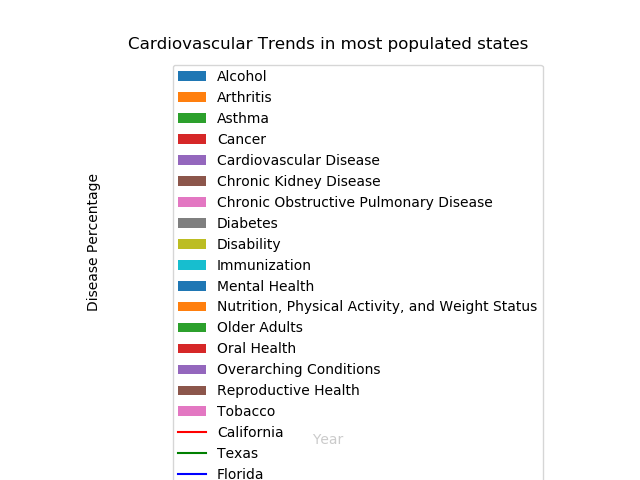

In [63]:
plot = pie2.plot.pie(y='DataValue', labels=pie2['Topic'],autopct="%1.1f%%", shadow=True, startangle=140)

In [ ]:
plt.pie(y='DataValue', explode=explode, labels=labels, colors=colors,
        autopct="%1.y='DataValue'1f%%", shadow=True, startangle=140)